In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

plt.style.use('ggplot')

%matplotlib inline

## Load the raw zooniverse data

In [2]:
ROOTDIR = '../'
image_dir = ROOTDIR + '/data/2015/'
inputfile = ROOTDIR  + '/data/2015-Z-ALL-COUNTERS.csv'
inputfile = ROOTDIR  + '/analysis/swc_zooniverse_data_22Nov17.csv'


raw_count_data = pd.read_csv(inputfile)
raw_count_data.drop_duplicates(inplace=True)

zoo_ok = pd.read_csv('zoo_ok.csv')


## Load the expert counts

In [3]:
inputfile = ROOTDIR  + '/data/expert.csv'
exp_count_data = pd.read_csv(inputfile)


## Choose 1000 images at random

In [4]:
np.random.seed(0)
test_images = exp_count_data['SWC_image'].values.copy()
np.random.shuffle(test_images)
indices = np.zeros(1000,dtype='int')

j=0
for i in range(474):
    #print(i)
    while True:
        #print(i,j,'in')
        if exp_count_data.loc[exp_count_data['SWC_image']==test_images[j],'expert'].values[0]==0:
        #    print(i,j,'breakon1')
            break
        #print(i,j,'break1')
        #print(test_images[j])
        #print(test_images[j] in raw_count_data['SWC_image'].values)
        #if test_images[j] in raw_count_data['SWC_image'].values:
         #   print(i,j,'breakon2')
         #   break
        #print(i,j,'break2')
        #print(test_images[j],j)
        j=j+1
    indices[i] = j
    j=j+1
j=0
for i in range(1000-474):
    while True:
        #print(i,j,'in')
        if exp_count_data.loc[exp_count_data['SWC_image']==test_images[j],'expert'].values[0]>0:
        #    print(i,j,'breakon1')
            #break
        #print(i,j,'break1')
        #print(test_images[j])
        #print(test_images[j] in raw_count_data['SWC_image'].values)
            if test_images[j] in zoo_ok['SWC_image'].values:
         #   print(i,j,'breakon2')
                break
        #print(i,j,'break2')
        #rint(test_images[j],j)
        j=j+1
    indices[i+474] = j
    j=j+1

test_images=test_images[indices]
np.random.shuffle(test_images)

#test_images = np.genfromtxt(ROOTDIR + '/data/2015-checked-test.txt',dtype='str')

## Weight each column so that if the point is at an internal edge it's weighted as a half

In [5]:
edge_w=0.5
raw_count_data['weight']=1

tile_cond = raw_count_data['tile_id'].str.contains("_1_1")
edge_cond = (raw_count_data['xcoord'] > 1810) | (raw_count_data['ycoord'] < 30)
raw_count_data.loc[(tile_cond)&(edge_cond),'weight']=edge_w

tile_cond = raw_count_data['tile_id'].str.contains("_1_2")
edge_cond = (raw_count_data['xcoord']>1810)|(raw_count_data['ycoord']<30)|(raw_count_data['ycoord']>1605)
raw_count_data.loc[(tile_cond)&(edge_cond),'weight']=edge_w

tile_cond = raw_count_data['tile_id'].str.contains("_1_3")
edge_cond = (raw_count_data['xcoord']>1810)|(raw_count_data['ycoord']>1605)
raw_count_data.loc[(tile_cond)&(edge_cond),'weight']=edge_w

tile_cond = raw_count_data['tile_id'].str.contains("_2_1")
edge_cond = (raw_count_data['xcoord']<30)|(raw_count_data['xcoord']>1810)|(raw_count_data['ycoord']<30)
raw_count_data.loc[(tile_cond)&(edge_cond),'weight']=edge_w

tile_cond = raw_count_data['tile_id'].str.contains("_2_2")
edge_cond = (raw_count_data['xcoord']<30)|(raw_count_data['xcoord']>1810)|(raw_count_data['ycoord']<30)|(raw_count_data['ycoord']>1605)
raw_count_data.loc[(tile_cond)&(edge_cond),'weight']=edge_w

tile_cond = raw_count_data['tile_id'].str.contains("_2_3")
edge_cond = (raw_count_data['xcoord']<30)|(raw_count_data['xcoord']>1810)|(raw_count_data['ycoord']>1605)
raw_count_data.loc[(tile_cond)&(edge_cond),'weight']=edge_w

tile_cond = raw_count_data['tile_id'].str.contains("_3_1")
edge_cond = (raw_count_data['xcoord']<30)|(raw_count_data['xcoord']>1810)|(raw_count_data['ycoord']<30)
raw_count_data.loc[(tile_cond)&(edge_cond),'weight']=edge_w

tile_cond = raw_count_data['tile_id'].str.contains("_3_2")
edge_cond = (raw_count_data['xcoord']<30)|(raw_count_data['xcoord']>1810)|(raw_count_data['ycoord']<30)|(raw_count_data['ycoord']>1605)
raw_count_data.loc[(tile_cond)&(edge_cond),'weight']=edge_w

tile_cond = raw_count_data['tile_id'].str.contains("_3_3")
edge_cond = (raw_count_data['xcoord']<30)|(raw_count_data['xcoord']>1810)|(raw_count_data['ycoord']>1605)
raw_count_data.loc[(tile_cond)&(edge_cond),'weight']=edge_w

tile_cond = raw_count_data['tile_id'].str.contains("_3_1")
edge_cond = (raw_count_data['xcoord']<30)|(raw_count_data['ycoord']<30)
raw_count_data.loc[(tile_cond)&(edge_cond),'weight']=edge_w


tile_cond = raw_count_data['tile_id'].str.contains("_4_2")
edge_cond = (raw_count_data['xcoord']<30)|(raw_count_data['xcoord']>1810)|(raw_count_data['ycoord']<30)|(raw_count_data['ycoord']>1605)
raw_count_data.loc[(tile_cond)&(edge_cond),'weight']=edge_w


tile_cond = raw_count_data['tile_id'].str.contains("_4_3")
edge_cond = (raw_count_data['xcoord']<30)|(raw_count_data['ycoord']>1605)
raw_count_data.loc[(tile_cond)&(edge_cond),'weight']=edge_w


raw_count_data.loc[(raw_count_data['xcoord'].isnull())|(raw_count_data['ycoord'].isnull()),'weight']=0



## Store the counts for each image tile and counter

In [6]:

zoo_count = np.zeros((1000,12,15)) 
exp_count = np.zeros(1000) 

i=0

for filename in test_images: 
    exp_count[i] = exp_count_data.loc[exp_count_data['SWC_image'] == filename,'expert'].values[0]
    df = raw_count_data[raw_count_data['SWC_image'] == filename]
    j=0
    for _,tile in df.groupby(['tile_id']):
        k=0
        tile_counts=np.zeros(15)
        for _,user in tile.groupby(['user_name']):
            thisCount = np.sum(user['weight'].values)
            tile_counts[k]=thisCount
            k=k+1
            if k==15: break
        # sort so that the counts are in increasing order
        zoo_count[i,j]=np.sort(tile_counts)
        j=j+1
    i=i+1
    
    

## Calculate the 10 best estimates to average based on RMS error

In [7]:
c=10
exp_total = np.sum(exp_count)
minERR=100000
for i in range(16-c):
    thisMean = np.sum(np.mean(zoo_count[:,:,i:i+c],axis=2),axis=1)
    ERR = ((np.mean(np.power(thisMean-exp_count,2)))**0.5)
    if minERR>ERR:
        minERR=ERR
        best_i=i
        
    


## Calculate the mean, median, filtered mean, highest, lowest zoo counts

In [8]:
# zoo count is an array images x tiles x counters
# we first aggregate the counters somehow (mean,max,etc) then sum over tiles
zoo_mean=np.sum(np.mean(zoo_count,axis=2),axis=1)
zoo_med=np.sum(np.median(zoo_count,axis=2),axis=1)
zoo_filt10=np.sum(np.mean(zoo_count[:,:,best_i:best_i+10],axis=2),axis=1)
zoo_max=np.sum(zoo_count[:,:,14],axis=1)
zoo_min=np.sum(zoo_count[:,:,0],axis=1)


## Load up the deep learning counts

In [9]:
yolo_data = pd.read_csv('count-2015-tuned-error-threshold.txt')
yolo = yolo_data['yolo'].values
yolo_expert = yolo_data['expert'].values


## Print data and make figures

In [10]:

print('zooniverse 1000: ', exp_total, ':: yolo 1000: ', np.sum(yolo_expert))

print('=========================')
print('mean zoo')
print('mean abs error, root mean sq error, percentage difference 1000 images')
print(np.mean(np.abs(zoo_mean-exp_count)), np.mean(np.power(zoo_mean-exp_count,2))**0.5,100*(np.sum(zoo_mean)-exp_total)/exp_total)
print('=========================')
print('median zoo')
print('mean abs error, root mean sq error, percentage difference 1000 images')
print(np.mean(np.abs(zoo_med-exp_count)), np.mean(np.power(zoo_med-exp_count,2))**0.5,100*(np.sum(zoo_med)-exp_total)/exp_total)
print('=========================')
print('filt10 zoo')
print('mean abs error, root mean sq error, percentage difference 1000 images')
print(np.mean(np.abs(zoo_filt10-exp_count)), np.mean(np.power(zoo_filt10-exp_count,2))**0.5,100*(np.sum(zoo_filt10)-exp_total)/exp_total)
print('=========================')
print('yolo') 
print(np.sum(yolo_expert),np.sum(yolo))
print('mean abs error, root mean sq error, percentage difference 1000 images')
print(np.mean(np.abs(yolo-yolo_expert)), np.mean(np.power(yolo-yolo_expert,2))**0.5,100*(np.sum(yolo)-np.sum(yolo_expert))/np.sum(yolo_expert))

zooniverse 1000:  19802.0 :: yolo 1000:  20489
mean zoo
mean abs error, root mean sq error, percentage difference 1000 images
2.8044000000000002 8.10532170860602 -11.440931892401439
median zoo
mean abs error, root mean sq error, percentage difference 1000 images
1.8345 5.845789082750079 -8.850116149883851
filt10 zoo
mean abs error, root mean sq error, percentage difference 1000 images
1.5784 4.0468530983963324 0.5519644480355667
yolo
20489 20631
mean abs error, root mean sq error, percentage difference 1000 images
1.702 5.9358234475091995 0.6930548098979941


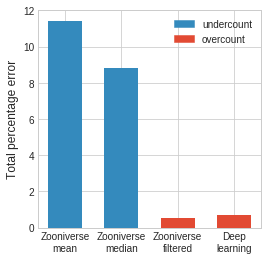

In [11]:
import matplotlib.patches as mpatches
plt.style.use('seaborn-whitegrid')

colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

x = np.arange(4)
zmean =  100*(np.sum(zoo_mean)-exp_total)/exp_total
zmed = 100*(np.sum(zoo_med)-exp_total)/exp_total
zfilt10 =  100*(np.sum(zoo_filt10)-exp_total)/exp_total
yoloerr = 100*(np.sum(yolo)-np.sum(yolo_expert))/np.sum(yolo_expert)
counterr = [abs(zmean),abs(zmed),abs(zfilt10),yoloerr]
plt.figure(figsize=(4,4))
plt.bar(x, counterr, width=0.6,color=[colors[1],colors[1],colors[0],colors[0]])


red_patch = mpatches.Patch(color=colors[0], label='overcount')
blue_patch = mpatches.Patch(color=colors[1], label='undercount')
plt.legend(handles=[blue_patch, red_patch])
plt.ylabel('Total percentage error')
plt.xticks(x, ('Zooniverse\nmean', 'Zooniverse\nmedian', 'Zooniverse\nfiltered',  'Deep\nlearning'))
plt.savefig('tot_err.png', bbox_inches='tight',dpi=300)

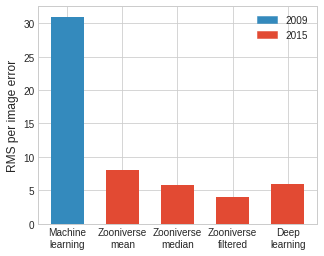

In [19]:
x = np.arange(5)
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
zmean =  np.mean(np.power(zoo_mean-exp_count,2))**0.5
zmed = ((np.mean(np.power(zoo_med-exp_count,2)))**0.5)
zfilt10 =  np.mean(np.power(zoo_filt10-exp_count,2))**0.5
yoloerr = np.mean(np.power(yolo-yolo_expert,2))**0.5
rmserr = [31,zmean,zmed,zfilt10,yoloerr]
plt.figure(figsize=(5,4))
plt.bar(x, rmserr, width=0.6,color=[colors[1],colors[0],colors[0],colors[0],colors[0]])
red_patch = mpatches.Patch(color=colors[0], label='2015')
blue_patch = mpatches.Patch(color=colors[1], label='2009')
plt.legend(handles=[blue_patch, red_patch])

plt.ylabel('RMS per image error')
plt.xticks(x, ('Machine\nlearning', 'Zooniverse\nmean', 'Zooniverse\nmedian', 'Zooniverse\nfiltered', 'Deep\nlearning'))
plt.savefig('rms.png', bbox_inches='tight',dpi=300)

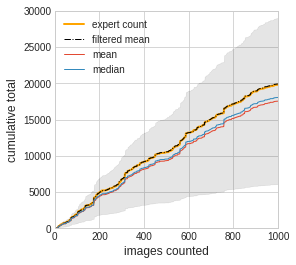

In [32]:

plt.figure(figsize=(4,4))
x=np.arange(1000)
plt.plot(x,np.cumsum(exp_count),label='expert count',color='orange',lw=2)
plt.plot(x, np.cumsum(zoo_filt10),label='filtered mean',linestyle='-.',color='black',lw=1)

plt.plot(x,np.cumsum(zoo_mean),label='mean',lw=1)
plt.plot(x,np.cumsum(zoo_med),label='median',lw=1)


plt.fill_between(x, np.cumsum(zoo_min), np.cumsum(zoo_max), color='black',alpha=0.1)
plt.xlim(0,1000)
plt.ylim(0,30000)
plt.xlabel('images counted')
plt.ylabel('cumulative total')
plt.legend(loc=2)

plt.savefig('zoo_worm.png', bbox_inches='tight',dpi=300)

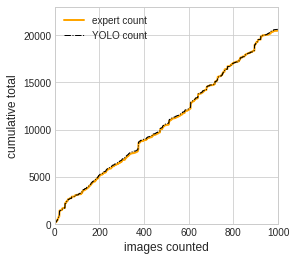

In [33]:

plt.figure(figsize=(4,4))
x=np.arange(1000)
plt.plot(x,np.cumsum(yolo_expert),label='expert count',color='orange',lw=2)
plt.plot(x,np.cumsum(yolo),label='YOLO count',linestyle='-.',color='black',lw=1)

plt.xlabel('images counted')
plt.ylabel('cumulative total')
plt.legend(loc=2)
plt.xlim(0,1000)
plt.ylim(0,23000)

plt.savefig('yolo_worm.png', bbox_inches='tight',dpi=300)

[0, 800, 0, 1]

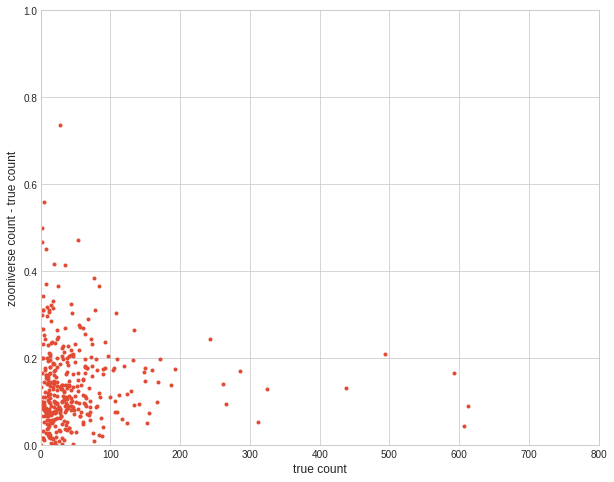

In [15]:

plt.figure(figsize=(10,8))
e2=exp_count[exp_count>zoo_mean]
z2=zoo_mean[exp_count>zoo_mean]
plt.plot(e2,(e2-z2)/e2,'.')


plt.xlabel('true count')
plt.ylabel('zooniverse count - true count')
plt.axis([0,800,0,1])
#plt.savefig('errorvcount.png', bbox_inches='tight',dpi=300)


In [16]:
for i in range(len(e2)): print(e2[i],(e2[i]-z2[i])/e2[i])

14.0 0.05238095238095245
4.0 0.01666666666666672
16.0 0.05208333333333337
25.0 0.24933333333333324
25.0 0.36666666666666664
168.0 0.14503968253968258
17.0 0.13333333333333328
14.0 0.09761904761904779
44.0 0.10833333333333331
63.0 0.2566137566137567
21.0 0.04444444444444445
51.0 0.03137254901960787
15.0 0.09111111111111114
43.0 0.1271317829457365
31.0 0.12903225806451613
23.0 0.144927536231884
45.0 0.1007407407407407
46.0 0.08840579710144934
15.0 0.06888888888888887
5.0 0.5599999999999999
107.0 0.07694704049844238
61.0 0.15136612021857926
26.0 0.0884615384615385
15.0 0.32222222222222224
41.0 0.03902439024390265
27.0 0.1864197530864198
124.0 0.05215053763440862
24.0 0.2652777777777778
312.0 0.05438034188034198
34.0 0.12156862745098038
64.0 0.18177083333333344
4.0 0.19999999999999996
4.0 0.016666666666666496
14.0 0.20952380952380942
57.0 0.271345029239766
60.0 0.2699999999999999
124.0 0.11908602150537634
60.0 0.04833333333333343
5.0 0.09333333333333335
13.0 0.11794871794871795
286.0 0.170